In [1]:
import sys, os 
import numpy as np 
import pandas as pd
from src import utils, plots
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import sem
%matplotlib inline
%load_ext autoreload
%autoreload 2

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 80 from C header, got 96 from PyObject


In [2]:
from matplotlib import rcParams
default_font = 12
fs_title = 16
rcParams["font.family"] = "Arial"
rcParams["savefig.dpi"] = 300
rcParams["axes.spines.top"] = False
rcParams["axes.spines.right"] = False
rcParams["axes.titlelocation"] = "left"
rcParams["axes.titleweight"] = "normal"
rcParams["font.size"] = default_font
trial_type_palette = ['tab:green', 'tab:red', 'tab:cyan', 'tab:orange', 'grey'] #rew #nrew #rew_test #nrew_test #GI

# gain as global effect or feature / task related only

In [3]:
VG11 = []
VG11.append({'mname': 'VG11', 'datexp': '2024_10_31', 'blk':'2'})
VG11.append({'mname': 'VG11', 'datexp': '2024_11_14', 'blk':'2'})
VG14 = []
VG14.append({'mname': 'VG14', 'datexp': '2024_11_21', 'blk':'2'})
VG15 = []
VG15.append({'mname': 'VG15', 'datexp': '2024_10_31', 'blk':'2'})
behav_sess = VG11 + VG14 + VG15

In [4]:
from pathlib import Path
areas = ["V1", "medial", "lateral", "anterior"]
dprime_tsh = [(50,60),(60,75), (75,95), (95,100)]
dprime_pos = [(0,125), (150,250)]
for sess in behav_sess:
    name = sess['mname']
    date = sess['datexp']
    blk = sess['blk']
    m1 = utils.load_mouse(name, date, blk, load_neurons=True, interp_behav=True, load_retinotopy=True, mdl_path=r"D:\mouseobj\notz")
    ntrials = m1.interp_spks.shape[1]
    ncells = m1.interp_spks.shape[0]
    non_selective_responses = np.empty((ntrials, len(areas), 2, len(dprime_pos), 400))
    a_responses = np.empty((ntrials, len(areas), 2, len(dprime_pos), len(dprime_tsh), 400))
    b_responses = np.empty((ntrials, len(areas), 2, len(dprime_pos), len(dprime_tsh), 400))
    for id_pos, d_pos in enumerate(dprime_pos):
        utils.compute_dprime(m1, discrimination_region=d_pos, concatenate=False, remove_mean=False)
        main_dir = Path(f"../data/notz/{name}/{date}/{blk}")
        if not main_dir.exists():
            main_dir.mkdir(parents=True)
        for indexa, area in enumerate(areas):
            ia = utils.get_region_idx(m1.iarea, area)
            for redcell in range(2):
                if redcell == 0:   
                    selected_type = np.logical_not(m1.isred[:,0]).astype(bool)
                else:
                    selected_type = m1.isred[:,0].astype(bool)
                for id_tsh, tsh in enumerate(dprime_tsh):
                    if tsh[0] == 95:
                        pstv_tsh, ngtv_tsh = utils.get_dp_thresholds(m1.train_dp[ia*selected_type], tsh=95) 
                        prefer_r = (m1.train_dp>=pstv_tsh)
                        prefer_nr = (m1.train_dp<=ngtv_tsh)
                        area_prefer_nr = ia * prefer_nr * selected_type
                        area_prefer_r = ia * prefer_r * selected_type
                        dir_for_type = m1.interp_spks 
                        a_selective = dir_for_type[area_prefer_r]
                        b_selective = dir_for_type[area_prefer_nr]
                        avg_a = a_selective.mean(0)
                        avg_b = b_selective.mean(0)
                        a_responses[:,indexa,redcell,id_pos,id_tsh,:] = avg_a
                        b_responses[:,indexa,redcell,id_pos,id_tsh,:] = avg_b
                    else:
                        pstv_tsh_lb, ngtv_tsh_lb = utils.get_dp_thresholds(m1.train_dp[ia*selected_type], tsh=tsh[0]) 
                        pstv_tsh_hb, ngtv_tsh_hb = utils.get_dp_thresholds(m1.train_dp[ia*selected_type], tsh=tsh[1])
                        prefer_r = (m1.train_dp>=pstv_tsh_lb) * (m1.train_dp<=pstv_tsh_hb)
                        prefer_nr = (m1.train_dp>=ngtv_tsh_hb) * (m1.train_dp<=ngtv_tsh_lb)
                        area_prefer_nr = ia * prefer_nr * selected_type
                        area_prefer_r = ia * prefer_r * selected_type
                        dir_for_type = m1.interp_spks 
                        a_selective = dir_for_type[area_prefer_r]
                        b_selective = dir_for_type[area_prefer_nr]
                        avg_a = a_selective.mean(0)
                        avg_b = b_selective.mean(0)
                        a_responses[:,indexa,redcell,id_pos,id_tsh,:] = avg_a
                        b_responses[:,indexa,redcell,id_pos,id_tsh,:] = avg_b
        #np.save(main_dir / f"a_responses_{d_pos[0]}_{d_pos[1]}.npy", a_responses)
        #np.save(main_dir / f"b_responses_{d_pos[0]}_{d_pos[1]}.npy", b_responses)

Checking if model object exists ...
Loading mouse object from D:\mouseobj\notz\VG11\2024_10_31\2
Existing mouse object has the following attributes:
dict_keys(['name', 'datexp', 'blk', 'data_path', '_timeline', '_data_var', '_settings', '_timestamps', '_trial_info', '_spks', '_ypos', '_xpos', '_iplane', '_stat', '_ops', '_snr', 'xy_t', 'iarea', 'iregion', 'outline', 'frameselector', 'isred', 'interp_spks', 'trial_dict', 'train_dp'])
dprime saved in MouseObject.train_dp (neurons) using even trials
dprime saved in MouseObject.train_dp (neurons) using even trials
Checking if model object exists ...
Loading mouse object from D:\mouseobj\notz\VG11\2024_11_14\2
Existing mouse object has the following attributes:
dict_keys(['name', 'datexp', 'blk', 'data_path', '_timeline', '_data_var', '_settings', '_timestamps', '_trial_info', '_spks', '_ypos', '_xpos', '_iplane', '_stat', '_ops', '_snr', 'xy_t', 'iarea', 'iregion', 'outline', 'frameselector', 'isred', 'interp_spks', 'trial_dict', 'train_dp

In [5]:
a_lr = np.empty((4, 4, 4, 2, 2, 4, 2), dtype=object)
b_lr= np.empty((4, 4, 4, 2, 2, 4, 2), dtype=object)
for sess, s_name in enumerate(behav_sess):
    name = s_name['mname']
    date = s_name['datexp']
    blk = s_name['blk']
    for id_pos, d_pos in enumerate(dprime_pos):
        apth = Path(fr"..\data\notz\{name}\{date}\{blk}\a_responses_{d_pos[0]}_{d_pos[1]}.npy")
        bpth = Path(fr"..\data\notz\{name}\{date}\{blk}\b_responses_{d_pos[0]}_{d_pos[1]}.npy")
        a_r = np.load(apth)
        b_r = np.load(bpth)
        m1 = utils.load_mouse(name, date, blk, load_neurons=True, interp_behav=True, load_retinotopy=True, mdl_path=r"D:\mouseobj\notz")
        for i_t, (ttype, trials) in enumerate(m1.trial_dict.items()):
            t_licks, t_no_licks = utils.get_trials_with_licks(m1, lick_window=(150,250), trialtype=ttype, onlytest=True)
            a_licks = a_r[t_licks]
            a_no_licks = a_r[t_no_licks] 
            b_licks = b_r[t_licks]
            b_no_licks = b_r[t_no_licks] 
            for area in range(4): 
                for cell_type in range(2):
                        for d_tsh in range(4):
                            a_lr[sess,i_t,area,cell_type,id_pos,d_tsh,0] = a_licks[:, area, cell_type, id_pos, d_tsh, :]
                            a_lr[sess,i_t,area,cell_type,id_pos,d_tsh,1] = a_no_licks[:, area, cell_type, id_pos, d_tsh, :]
                            b_lr[sess,i_t,area,cell_type,id_pos,d_tsh,0] = b_licks[:, area, cell_type, id_pos, d_tsh, :]
                            b_lr[sess,i_t,area,cell_type,id_pos,d_tsh,1] = b_no_licks[:, area, cell_type, id_pos, d_tsh, :]
#np.save(f"../data/notz/overall/a_response_perttype_area_ctype_dppos_dptsh_andlicknolick.npy", a_lr)
#np.save(f"../data/notz/overall/b_response_perttype_area_ctype_dppos_dptsh_andlicknolick.npy", b_lr)

Checking if model object exists ...
Loading mouse object from D:\mouseobj\notz\VG11\2024_10_31\2
Existing mouse object has the following attributes:
dict_keys(['name', 'datexp', 'blk', 'data_path', '_timeline', '_data_var', '_settings', '_timestamps', '_trial_info', '_spks', '_ypos', '_xpos', '_iplane', '_stat', '_ops', '_snr', 'xy_t', 'iarea', 'iregion', 'outline', 'frameselector', 'isred', 'interp_spks', 'trial_dict', 'train_dp'])
Checking if model object exists ...
Loading mouse object from D:\mouseobj\notz\VG11\2024_10_31\2
Existing mouse object has the following attributes:
dict_keys(['name', 'datexp', 'blk', 'data_path', '_timeline', '_data_var', '_settings', '_timestamps', '_trial_info', '_spks', '_ypos', '_xpos', '_iplane', '_stat', '_ops', '_snr', 'xy_t', 'iarea', 'iregion', 'outline', 'frameselector', 'isred', 'interp_spks', 'trial_dict', 'train_dp'])
Checking if model object exists ...
Loading mouse object from D:\mouseobj\notz\VG11\2024_11_14\2
Existing mouse object has the

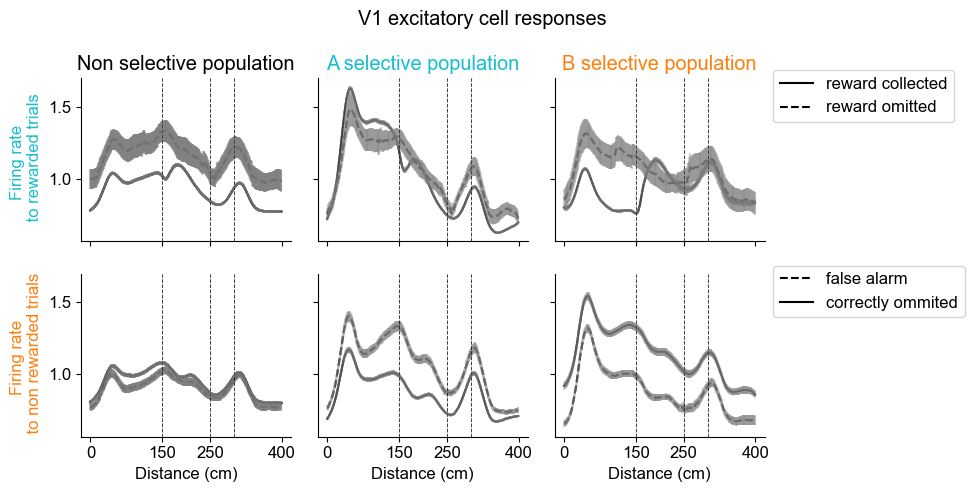

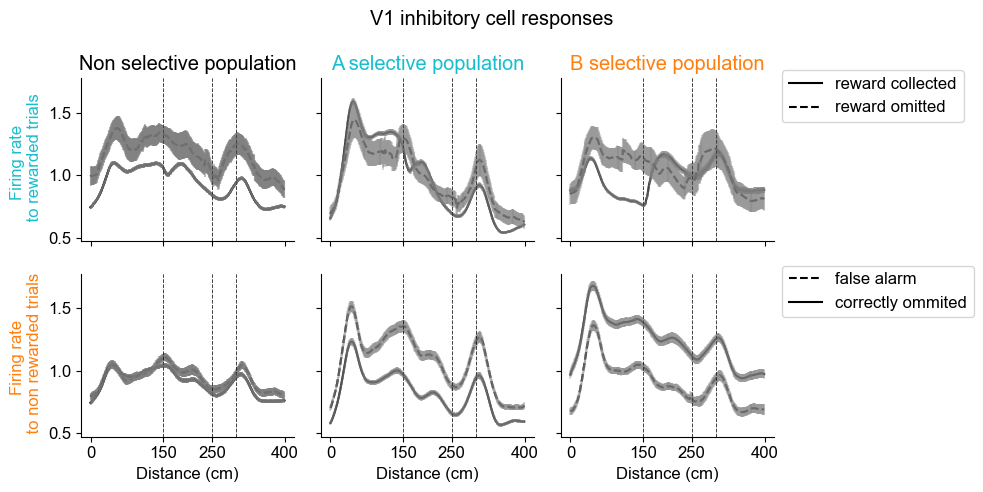

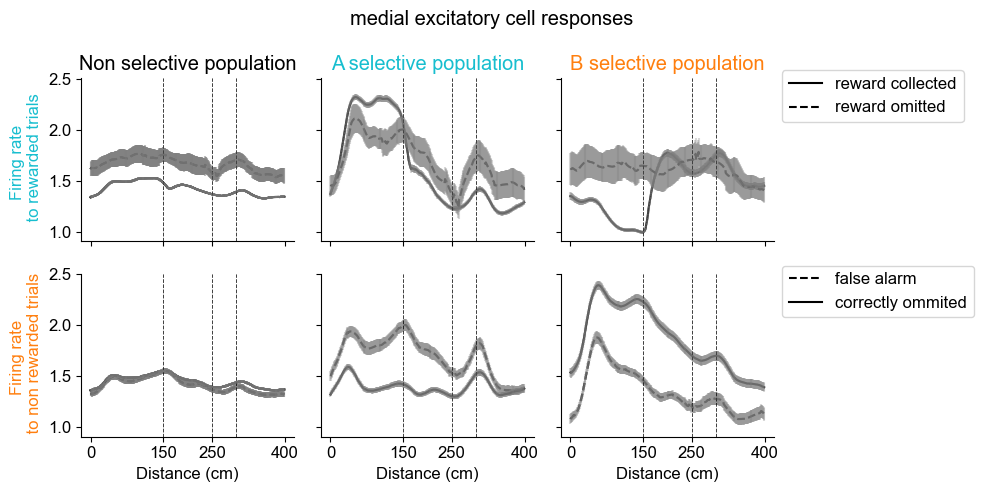

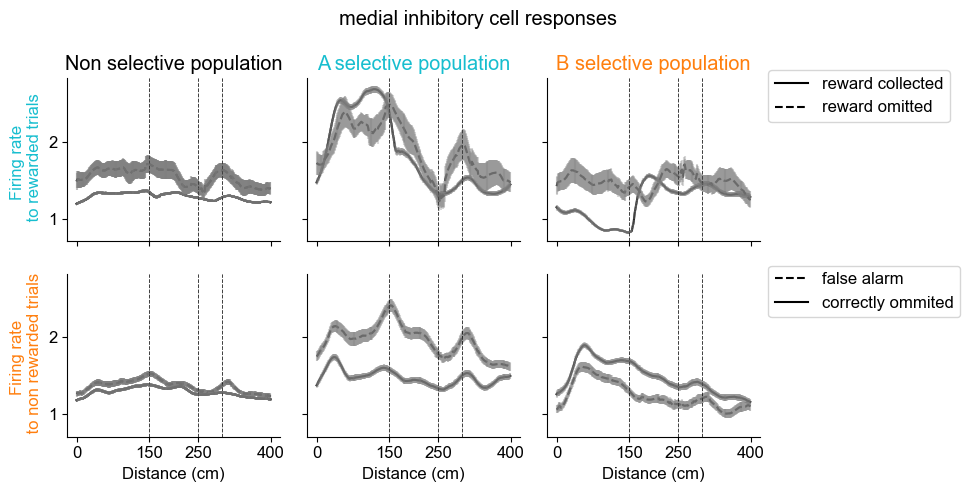

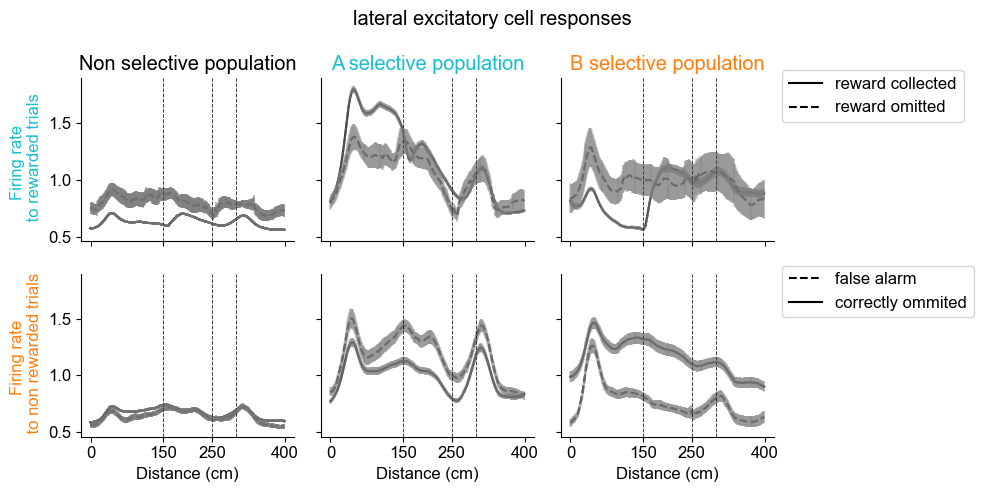

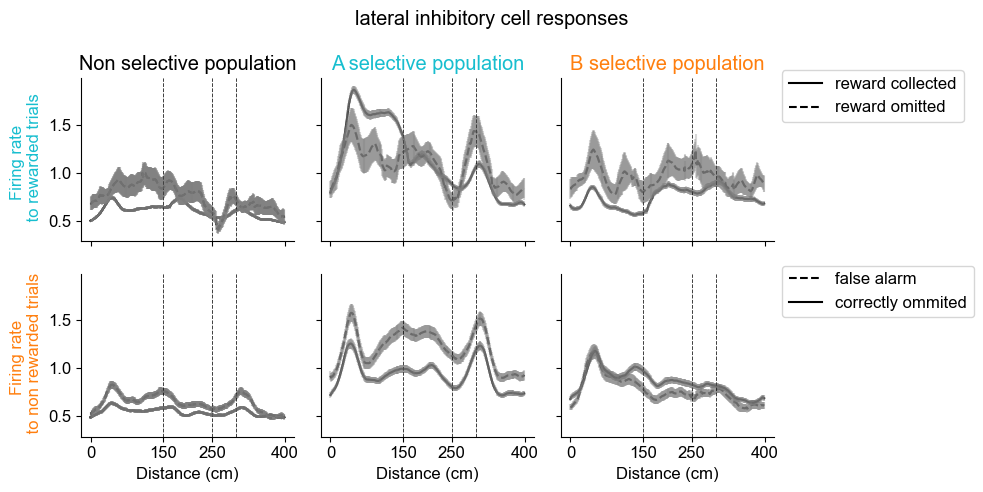

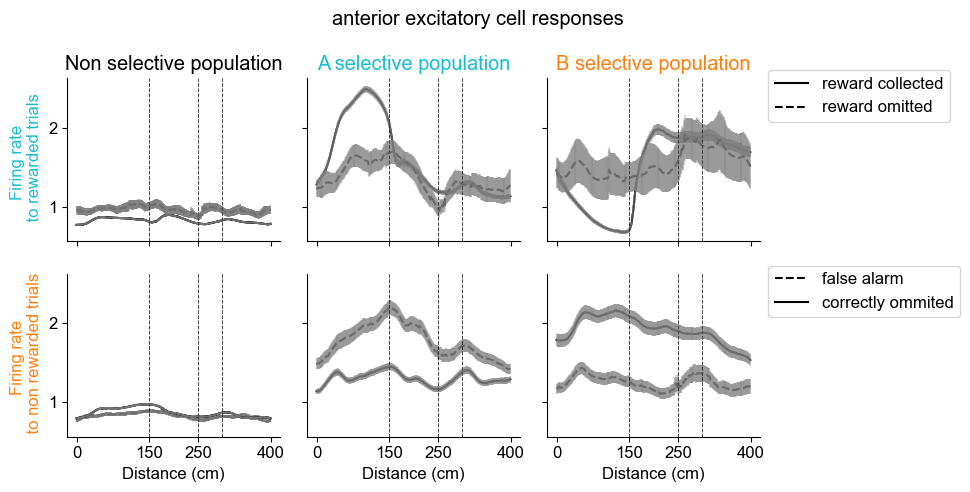

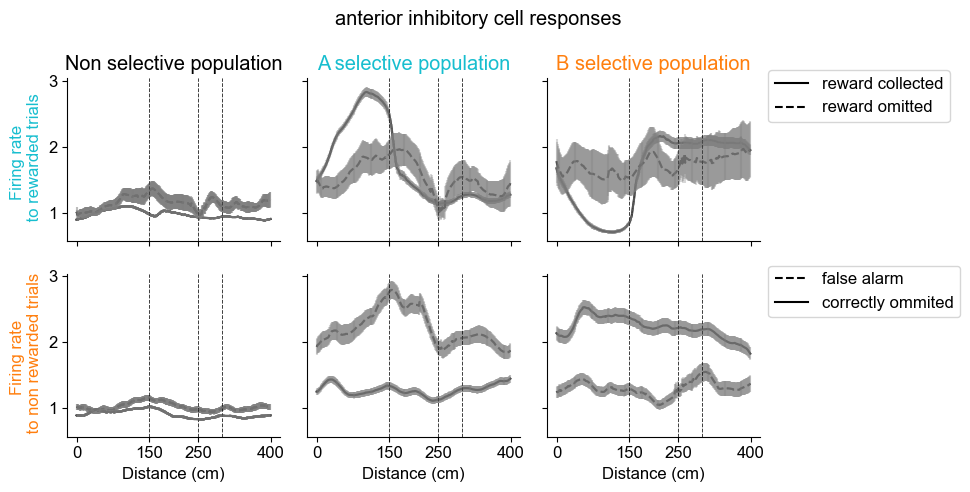

In [6]:
areas = ['V1', 'medial', 'lateral', 'anterior']
day_titles = ['all rewarded before training', 'first training day', 'last training day', 'all rewarded after training']
correct_offset = False
for a, area in enumerate(areas):
    for cell_type in range(2):
        fig, ax = plt.subplots(2,3, figsize=(10,5), sharey=True, sharex=True)
        if cell_type == 0:
            fig.suptitle(f'{area} excitatory cell responses', y=0.98)
        else:
            fig.suptitle(f'{area} inhibitory cell responses', y=0.98)
        for lick in range(2):
            for ir, r in enumerate([2,3]):
                if (lick == 0) & (ir == 0):
                    ls = '-'
                    label = "reward collected"
                elif (lick == 1) & (ir == 0):
                    ls = '--'
                    label = "reward omitted"
                elif (lick == 1) & (ir == 1):
                    ls = '-'
                    label = "correctly ommited"
                elif (lick == 0) & (ir == 1):
                    ls = '--'
                    label = "false alarm"
                a_r = a_lr[:,r,a,cell_type,0,3,lick]
                b_r = b_lr[:,r,a,cell_type,0,3,lick]
                a_ns_r = a_lr[:,r,a,cell_type,0,0,lick]
                b_ns_r = b_lr[:,r,a,cell_type,0,0,lick]
                a_r = np.vstack(a_r) 
                b_r = np.vstack(b_r)
                a_ns_r = np.vstack(a_ns_r)
                b_ns_r = np.vstack(a_ns_r)
                if correct_offset:
                    a_r = a_r - a_r[:,0].mean()
                    b_r = b_r - b_r[:,0].mean()
                    a_ns_r = a_ns_r  - a_ns_r[:,0].mean() 
                    b_ns_r = b_ns_r  - b_ns_r[:,0].mean()
                ax[ir,0].plot(a_ns_r.mean(0), color='k', linestyle=ls, label=label)
                ax[ir,0].errorbar(np.arange(400), a_ns_r.mean(0), yerr=sem(a_ns_r), color='gray', linestyle=ls, alpha = 0.3)
                ax[ir,0].plot(b_ns_r.mean(0), color='k', linestyle=ls, label=label)
                ax[ir,0].errorbar(np.arange(400), b_ns_r.mean(0), yerr=sem(b_ns_r), color='gray', linestyle=ls, alpha = 0.3)
                ax[ir,1].plot(a_r.mean(0), color='k', linestyle=ls, label=label)
                ax[ir,1].errorbar(np.arange(400), a_r.mean(0), yerr=sem(a_r), color='gray', linestyle=ls, alpha = 0.3)
                ax[ir,2].plot(b_r.mean(0), color='k', linestyle=ls, label=label)
                ax[ir,2].errorbar(np.arange(400), b_r.mean(0), yerr=sem(b_r), color='gray', linestyle=ls, alpha = 0.3)
                for p in range(3):
                    ax[ir,p].axvline(x=150, color='k', linestyle='--', linewidth=0.7, alpha = 0.5)
                    ax[ir,p].axvline(x=250, color='k', linestyle='--', linewidth=0.7, alpha = 0.5)
                    ax[ir,p].axvline(x=300, color='k', linestyle='--', linewidth=0.7, alpha = 0.5)
                    ax[1,p].set_xlabel('Distance (cm)')
                    ax[1,p].set_xticks([0, 150, 250, 400])
        ax[0,0].set_ylabel('Firing rate \n to rewarded trials', rotation=90, color='tab:cyan')
        ax[1,0].set_ylabel('Firing rate \n to non rewarded trials', rotation=90, color = 'tab:orange')
        ax[0,0].set_title('Non selective population', loc='center')
        ax[0,1].set_title('A selective population', loc='center', color='tab:cyan')
        ax[0,2].set_title('B selective population', loc='center', color='tab:orange')
        ax[0,-1].legend(bbox_to_anchor=(1., 1.1), loc='upper left')
        ax[1,-1].legend(bbox_to_anchor=(1., 1.1), loc='upper left')
        fig.tight_layout()
        plt.show()

In [7]:
print(a_lr.shape, "mice, trial type, area, cell type, dprime pos, dprime tsh, lick or no lick")

(4, 4, 4, 2, 2, 4, 2) mice, trial type, area, cell type, dprime pos, dprime tsh, lick or no lick
